# Introduction

The Perceptron invented in 1957 by Frank Rosenblatt is the simplest neural network.

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers.

A perceptron consists of one or more inputs, a processor, and a single output. It is a model of a single neuron:

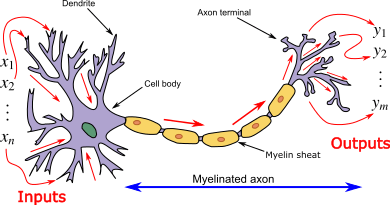 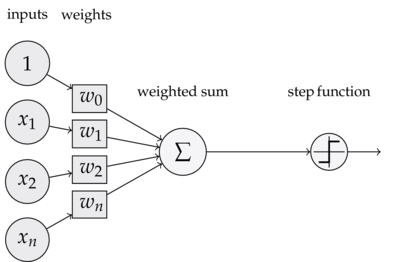

In the modern sense, the perceptron is an algorithm for learning a binary classifier called a threshold function: a function that maps its input X (a real-valued vector) to an output value f(x) (a single binary value):
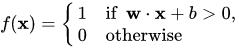

Where w is a vector of real-valued weights and b is the bias. The bias shifts the decision boundary away from the origin and does not depend on any input value.

# Imports and Plot tool

In [448]:
import random
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output

In [449]:
def plot_decision(weights, bias, input_signals):
    display.clear_output(wait=True)     
    plt.clf()
  
    w1, w2 = weights[0], weights[1]
    b = bias
    group_len = int(len(input_signals)/2)

    # Plot Dots
    red_x_coordinates = [dot[0] for dot in input_signals[0:group_len]]
    red_y_coordinates = [dot[1] for dot in input_signals[0:group_len]]
    
    blue_x_coordinates = [dot[0] for dot in input_signals[group_len:]]
    blue_y_coordinates = [dot[1] for dot in input_signals[group_len:]]
    
    plt.scatter(red_x_coordinates, red_y_coordinates,c='Red')
    plt.scatter(blue_x_coordinates, blue_y_coordinates,c='Blue')
    
    # Plot Decision Boundary    
    x_values = [-50, 50]
    y_values = [(-(b / w2) / (b / w1)) * -50 + (-b / w2), 
                (-(b / w2) / (b / w1)) * 50 + (-b / w2)]
    plt.plot(x_values, y_values)
    
    plt.xlim(-10,30)
    plt.ylim(-10,30)
  
    plt.show(block=False)

# Perceptron

In [458]:
class Perceptron:
    def __init__(self, inputs, learning_rate):
        self.inputs = inputs
        self.lr = learning_rate

    def initialize_weights(self):
        self.w = [random.random() for w in range(self.inputs)]
        self.b = random.random()

    def train(self, x, target):        
        z = sum([self.w[i]*(x[i]) for i in range(self.inputs)]) + self.b
        output = 1 if z > 0 else 0
        
        error = target - output
        
        #Updating the weights and the bias
        for i in range(self.inputs):
            self.w[i] += self.lr * error * (x[i])

        self.b += self.lr * error

    def predict(self, x):
        z = sum([self.w[i]*x[i] for i in range(self.inputs)]) + self.b
        return 1 if z >= 0 else 0

# Example of a two-class (binary) classification.

In [459]:
# Training Set Variables
dots = 10

red_dots = [[20+random.randint(-10, 10), 20+random.randint(-15, 5)] for i in range(dots)]
blue_dots = [[0+random.randint(-10, 10), 0+random.randint(-5, 15)] for i in range(dots)]

input_signals = red_dots + blue_dots

red_dots_label = [1 for i in range(dots)]
blue_dots_label = [0 for i in range(dots)]

labels = red_dots_label+blue_dots_label

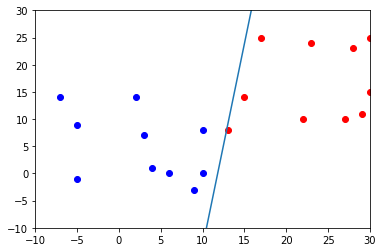

Train is finished.
Prediction accuracy: 100.0%


In [460]:
# Perceptron Variables
inputs = 2
learning_rate = 0.1

nn = Perceptron(inputs, learning_rate)
nn.initialize_weights()

for epoch in range(500):
    for i in range(len(input_signals)):
        nn.train(input_signals[i],labels[i])
    plot_decision(nn.w, nn.b,input_signals)   
print("Train is finished.")

# Check Trained Perceptron
predictions = [nn.predict(input_signals[i]) == labels[i] for i in range(len(input_signals))]
print(f"Prediction accuracy: {(predictions.count(True)/len(predictions)*100)}%")
